Nama : Raafi Nur Adzani   
KIM : A11.2021.13536


# Import Library

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Data Loading

In [71]:
df = pd.read_csv("Cost_of_Living_Index_2022.csv")

In [72]:
pd.set_option("display.max.row",None)
df

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
5,6,Australia,77.75,36.84,58.57,77.44,72.95,104.63
6,7,Austria,71.04,27.13,50.46,65.88,66.03,77.25
7,8,Azerbaijan,29.73,7.86,19.48,26.57,26.73,27.26
8,9,Bahamas,84.00,35.34,61.19,70.59,89.09,45.07
9,10,Bahrain,54.77,29.22,42.79,44.59,48.94,61.41


# Data Cleansing

In [73]:
df_baru.isnull().sum()

Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

# Preprocessing

In [74]:
df_baru = df.iloc[[1,9,10,21,25,49,52,53,55,56,57,61,63,64,67,69,74,80,83,84,92,93,97,101,103,105,109,120,121,123,126,129,133,135,136,],:]

In [75]:
df_baru

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
9,10,Bahrain,54.77,29.22,42.79,44.59,48.94,61.41
10,11,Bangladesh,33.13,4.42,19.67,30.41,21.70,25.30
21,22,Cambodia,49.11,15.68,33.44,50.61,22.90,13.32
25,26,China,41.77,16.53,29.93,46.01,28.37,59.99
49,50,Hong Kong,80.71,74.57,77.83,84.72,58.58,65.74
52,53,India,24.43,5.30,15.47,26.43,17.56,49.72
53,54,Indonesia,35.85,9.82,23.65,38.29,17.74,21.07
55,56,Iraq,34.47,10.63,23.29,30.46,28.31,40.92
56,57,Ireland,76.05,42.08,60.13,62.10,80.40,82.27


# Exploring Data Analyst

<Figure size 2000x2300 with 0 Axes>

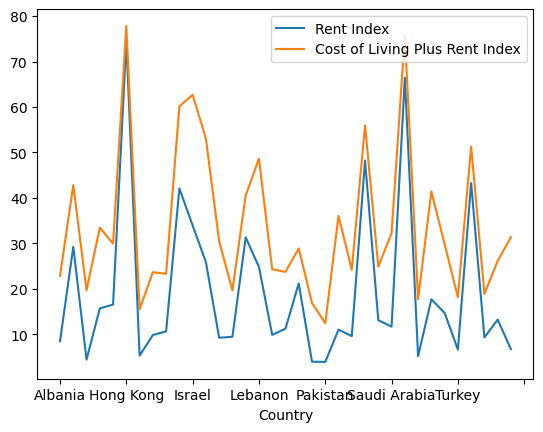

In [96]:
plt.figure(figsize=(20, 23))
df_baru.groupby("Country")[["Rent Index", "Cost of Living Plus Rent Index"]].mean().plot()
plt.show()

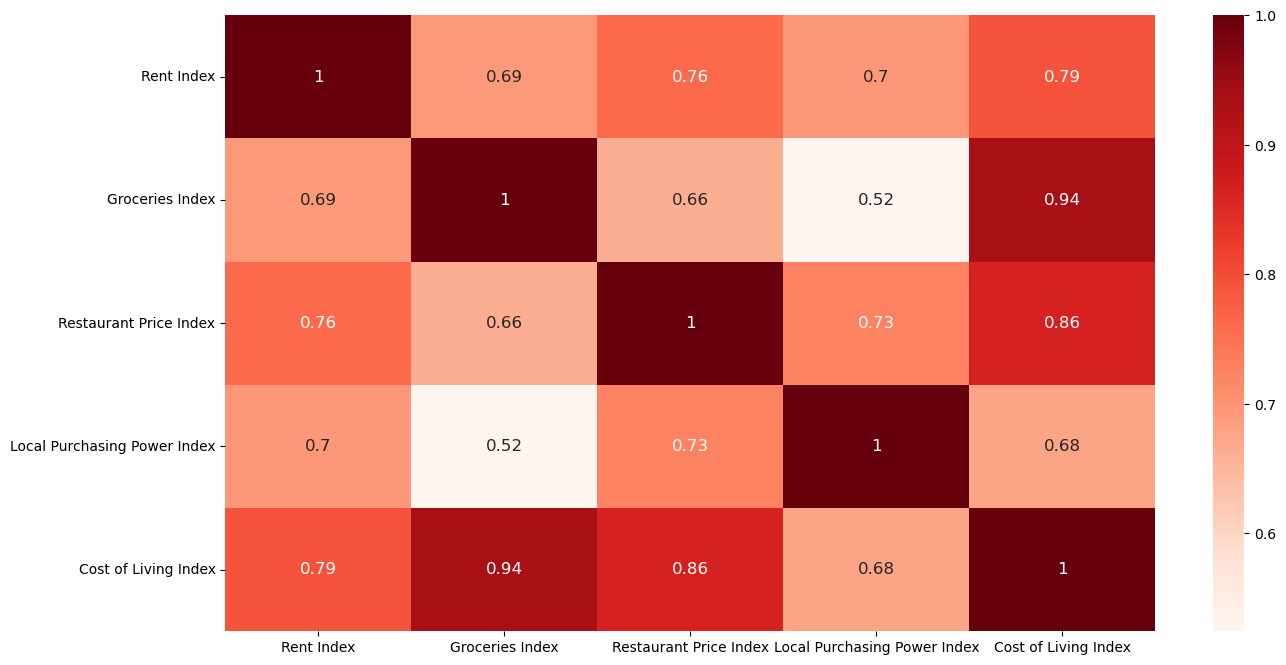

In [109]:
# Menghitung matriks korelasi antar kolom pada DataFrame 'df'
m = df_baru[["Rent Index", "Groceries Index", "Restaurant Price Index", "Local Purchasing Power Index", "Cost of Living Index"]]
matriksCorr = m.corr()

# Membuat gambar plot dengan ukuran (figsize) 15x8
plt.figure(figsize=(15, 8))

# Membuat heatmap menggunakan seaborn untuk memvisualisasikan matriks korelasi
# Parameter 'cmap' mengatur skema warna heatmap menjadi 'Reds'
# Parameter 'annot=True' mengaktifkan penulisan nilai korelasi di dalam sel
# Parameter 'annot_kws={'fontsize':12}' mengatur ukuran font untuk nilai korelasi menjadi 12
sns.heatmap(matriksCorr, cmap='Reds', annot=True, annot_kws={'fontsize': 12})

# Menampilkan gambar plot
plt.show()

C:\Users\asd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Cost of Living Index')

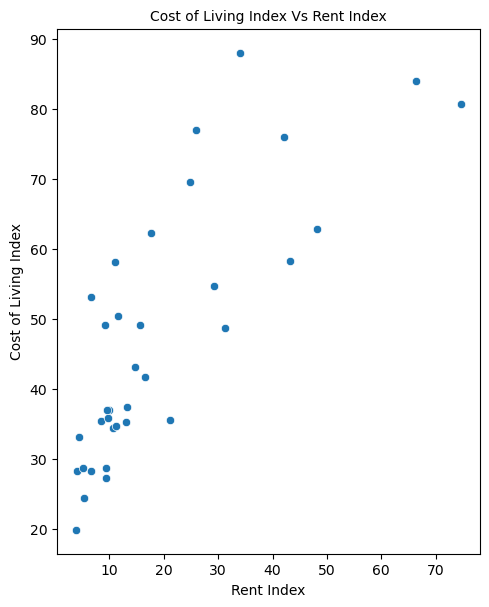

In [110]:
plt.rcParams['figure.figsize'] = (12,15)

plt.subplot(2,2,1)
sns.scatterplot(m['Rent Index'],m['Cost of Living Index'])
plt.title('Cost of Living Index Vs Rent Index', fontsize =10)
plt.xlabel('Rent Index')
plt.ylabel('Cost of Living Index')

# plt.subplot(2,2,3)
# sns.scatterplot(m['ONEOFF_PURCHASES'],m['Cost of Living Index'])
# plt.title('Cost of Living Index Vs One Off Purchases', fontsize =10)
# plt.xlabel('One off purchases')
# plt.ylabel('Cost of Living Index')

# plt.subplot(2,2,4)
# sns.scatterplot(m['INSTALLMENTS_PURCHASES'],m['Cost of Living Index'])
# plt.title('Cost of Living Index Vs Installments Purchases', fontsize =10)
# plt.xlabel('Installment Purchases')
# plt.ylabel('Cost of Living Index')

In [63]:
df_baru.drop(["Rank", "Country", "Cost of Living Plus Rent Index"],axis=1, inplace=True)

C:\Users\asd\AppData\Local\Temp\ipykernel_14852\53293318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baru.drop(["Rank", "Country"],axis=1, inplace=True)


# Model Definition

In [116]:
model_KNN = KNeighborsRegressor()
model_LR = LinearRegression()
model_RF = RandomForestRegressor()

# Selection Feature

In [65]:
X = df_baru.drop("Cost of Living Index", axis=1)
Y = df_baru["Cost of Living Index"]

# Spliting Data

In [66]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Modeling dan Evaluasi Model

In [118]:
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_test)
print(f'RMSE: {mean_squared_error(Y_test, Y_pred)}')
print(f'MAE: {mean_absolute_error(Y_test, Y_pred)}')
print(f'R2 Score: {r2_score(Y_test, Y_pred)}')

RMSE: 3.548891764212822e-05
MAE: 0.004663100172369943
R2 Score: 0.9999999110691867


In [119]:
model_KNN.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_test)
print(f'RMSE: {mean_squared_error(Y_test, Y_pred)}')
print(f'MAE: {mean_absolute_error(Y_test, Y_pred)}')
print(f'R2 Score: {r2_score(Y_test, Y_pred)}')

RMSE: 3.548891764212822e-05
MAE: 0.004663100172369943
R2 Score: 0.9999999110691867


In [120]:
model_RF.fit(X_train, Y_train)
Y_pred = model_RF.predict(X_test)
print(f'RMSE: {mean_squared_error(Y_test, Y_pred)}')
print(f'MAE: {mean_absolute_error(Y_test, Y_pred)}')
print(f'R2 Score: {r2_score(Y_test, Y_pred)}')

RMSE: 24.322638748571222
MAE: 3.698657142857133
R2 Score: 0.9390504927042408
